In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('lstm_minimalistic_input.csv')
df

,date,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_50,RSI,...,bert_vec_758,bert_vec_759,bert_vec_760,bert_vec_761,bert_vec_762,bert_vec_763,bert_vec_764,bert_vec_765,bert_vec_766,bert_vec_767
0,2020-03-13,0.045745,0.063333,0.049321,0.066033,0.063674,0.918191,0.057580,0.037657,0.387356,...,0.545544,-0.553940,-1.070105,0.525724,0.785139,-1.078844,-0.499284,-0.400016,1.548267,0.102505
1,2020-03-16,0.017237,0.037665,0.033488,0.021978,0.021193,0.790546,0.052062,0.034413,0.247342,...,-0.292653,-1.179898,-0.855864,-0.375883,0.403585,-0.603344,-0.349450,-0.044822,1.192861,-0.292855
2,2020-03-17,0.024146,0.035854,0.031532,0.035099,0.033844,0.794859,0.047652,0.031902,0.306571,...,0.344365,-0.296468,-0.917413,0.069898,0.549268,-0.780546,-0.178432,-0.665418,1.558002,0.150759
3,2020-03-18,0.014528,0.026481,0.029967,0.027473,0.026491,0.731914,0.042520,0.029137,0.283683,...,-0.345684,-1.792219,-0.411793,-0.064347,0.464956,-0.130157,0.380487,-0.782903,-0.080783,0.071862
4,2020-03-19,0.023997,0.029979,0.036679,0.025144,0.024246,0.656935,0.037484,0.026374,0.276493,...,-0.088898,-0.718323,-0.997769,0.355838,0.991445,-0.484337,-0.509619,-0.043376,1.084413,0.063778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,2024-12-24,0.986579,0.990688,0.988556,0.995959,0.995991,0.000000,0.981242,0.986463,0.896374,...,-0.244931,-1.148931,-0.285080,0.113003,-0.065337,-0.188608,0.242954,-0.912056,-0.802476,-0.442516
1205,2024-12-26,1.000000,1.000000,1.000000,1.000000,1.000000,0.010576,0.987634,0.991158,0.908132,...,0.559549,-0.243713,-0.454257,-0.572058,0.389740,-0.894127,0.101684,-0.571348,1.227521,-0.226830
1206,2024-12-27,0.998210,0.993103,0.977650,0.983097,0.983228,0.050522,0.993145,0.994889,0.760946,...,-0.015913,-1.049660,-0.648757,-1.235360,-0.017515,0.045988,-0.253670,-0.772506,-0.768945,0.250895
1207,2024-12-30,0.970373,0.967484,0.966353,0.966392,0.966652,0.032561,0.997111,0.997702,0.637513,...,-0.381994,-0.959807,-0.212318,-0.857934,-0.079345,-0.398600,-0.233491,-0.487082,-0.065015,-0.113206


In [2]:
from sklearn.preprocessing import MinMaxScaler

# Identify columns that start with 'bert_'
bert_columns = [col for col in df.columns if col.startswith('bert_')]



## checking if all the columns are scaled from 0 to 1

In [3]:
# Check min and max values for each bert_ column

for col in df.columns:
    if col != 'date':
        min_val = df[col].min()
        max_val = df[col].max()
        print(f"Column: {col} → Min: {min_val:.4f}, Max: {max_val:.4f}")

Column: Open → Min: 0.0000, Max: 1.0000
Column: High → Min: 0.0000, Max: 1.0000
Column: Low → Min: 0.0000, Max: 1.0000
Column: Close → Min: 0.0000, Max: 1.0000
Column: Adj Close → Min: 0.0000, Max: 1.0000
Column: Volume → Min: 0.0000, Max: 1.0000
Column: SMA_20 → Min: 0.0000, Max: 1.0000
Column: EMA_50 → Min: 0.0000, Max: 1.0000
Column: RSI → Min: 0.0000, Max: 1.0000
Column: Bollinger_High → Min: 0.0000, Max: 1.0000
Column: Bollinger_Low → Min: 0.0000, Max: 1.0000
Column: MACD → Min: 0.0000, Max: 1.0000
Column: sentiment → Min: 0.0000, Max: 2.0000
Column: bert_vec_0 → Min: -1.4570, Max: 0.9491
Column: bert_vec_1 → Min: -1.0756, Max: 1.5442
Column: bert_vec_2 → Min: -1.8299, Max: 2.7375
Column: bert_vec_3 → Min: -0.8272, Max: 0.8853
Column: bert_vec_4 → Min: -1.1402, Max: 1.6064
Column: bert_vec_5 → Min: -1.8005, Max: 0.8868
Column: bert_vec_6 → Min: -1.4344, Max: 1.4539
Column: bert_vec_7 → Min: -0.9570, Max: 1.7369
Column: bert_vec_8 → Min: -1.2210, Max: 1.4230
Column: bert_vec_9 → Mi

## Spliting the data and applying sequence

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.weekday  # 0 = Monday, 6 = Sunday
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)  # 1 for Sat/Sun, 0 otherwise
df = df.drop(columns=['date'])
df.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Adj Close      float64
                ...   
year             int32
month            int32
day              int32
day_of_week      int32
is_weekend       int32
Length: 786, dtype: object

## Training phase

In [5]:
# Identify object-type columns
object_columns = df.select_dtypes(include=['object']).columns
print("Columns with object dtype:", object_columns.tolist())
df.isnull().sum()

Columns with object dtype: []


Open           0
High           0
Low            0
Close          0
Adj Close      0
              ..
year           0
month          0
day            0
day_of_week    0
is_weekend     0
Length: 786, dtype: int64

In [6]:
import joblib
# Load the saved scaler
scaler = joblib.load("scaler.pkl")

print("✅ Scaler loaded successfully!")

# List of features already scaled
old_features = list(scaler.feature_names_in_)  # Extract previous features

# new_scaler = MinMaxScaler(feature_range=(0, 1))
# new_scaler.fit(df)  # Fit with both old and new features

# # Save the updated scaler
# joblib.dump(new_scaler, "scaler_updated.pkl")

# print("✅ Scaler has been updated and saved successfully!")


✅ Scaler loaded successfully!


In [7]:
new_scaler_other_features = MinMaxScaler(feature_range=(0, 1))
scaler_year = MinMaxScaler(feature_range=(0, 1))

In [8]:
df_columns = [col for col in df.columns if col != 'year']
df_columns

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'SMA_20',
 'EMA_50',
 'RSI',
 'Bollinger_High',
 'Bollinger_Low',
 'MACD',
 'sentiment',
 'bert_vec_0',
 'bert_vec_1',
 'bert_vec_2',
 'bert_vec_3',
 'bert_vec_4',
 'bert_vec_5',
 'bert_vec_6',
 'bert_vec_7',
 'bert_vec_8',
 'bert_vec_9',
 'bert_vec_10',
 'bert_vec_11',
 'bert_vec_12',
 'bert_vec_13',
 'bert_vec_14',
 'bert_vec_15',
 'bert_vec_16',
 'bert_vec_17',
 'bert_vec_18',
 'bert_vec_19',
 'bert_vec_20',
 'bert_vec_21',
 'bert_vec_22',
 'bert_vec_23',
 'bert_vec_24',
 'bert_vec_25',
 'bert_vec_26',
 'bert_vec_27',
 'bert_vec_28',
 'bert_vec_29',
 'bert_vec_30',
 'bert_vec_31',
 'bert_vec_32',
 'bert_vec_33',
 'bert_vec_34',
 'bert_vec_35',
 'bert_vec_36',
 'bert_vec_37',
 'bert_vec_38',
 'bert_vec_39',
 'bert_vec_40',
 'bert_vec_41',
 'bert_vec_42',
 'bert_vec_43',
 'bert_vec_44',
 'bert_vec_45',
 'bert_vec_46',
 'bert_vec_47',
 'bert_vec_48',
 'bert_vec_49',
 'bert_vec_50',
 'bert_vec_51',
 'bert_vec_52',
 'bert_vec_

In [9]:
df[df_columns] = new_scaler_other_features.fit_transform(df[df_columns])

In [10]:
df[['year']] = scaler_year.fit_transform(df[['year']])

In [11]:
# Save the scalers for later use
joblib.dump(new_scaler_other_features, "new_scaler_other_features.pkl")
joblib.dump(scaler_year, "scaler_year.pkl")

print("✅ Year is now correctly scaled separately!")

✅ Year is now correctly scaled separately!


In [12]:
scaler_check = list(new_scaler_other_features.feature_names_in_)
scaler_check

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'SMA_20',
 'EMA_50',
 'RSI',
 'Bollinger_High',
 'Bollinger_Low',
 'MACD',
 'sentiment',
 'bert_vec_0',
 'bert_vec_1',
 'bert_vec_2',
 'bert_vec_3',
 'bert_vec_4',
 'bert_vec_5',
 'bert_vec_6',
 'bert_vec_7',
 'bert_vec_8',
 'bert_vec_9',
 'bert_vec_10',
 'bert_vec_11',
 'bert_vec_12',
 'bert_vec_13',
 'bert_vec_14',
 'bert_vec_15',
 'bert_vec_16',
 'bert_vec_17',
 'bert_vec_18',
 'bert_vec_19',
 'bert_vec_20',
 'bert_vec_21',
 'bert_vec_22',
 'bert_vec_23',
 'bert_vec_24',
 'bert_vec_25',
 'bert_vec_26',
 'bert_vec_27',
 'bert_vec_28',
 'bert_vec_29',
 'bert_vec_30',
 'bert_vec_31',
 'bert_vec_32',
 'bert_vec_33',
 'bert_vec_34',
 'bert_vec_35',
 'bert_vec_36',
 'bert_vec_37',
 'bert_vec_38',
 'bert_vec_39',
 'bert_vec_40',
 'bert_vec_41',
 'bert_vec_42',
 'bert_vec_43',
 'bert_vec_44',
 'bert_vec_45',
 'bert_vec_46',
 'bert_vec_47',
 'bert_vec_48',
 'bert_vec_49',
 'bert_vec_50',
 'bert_vec_51',
 'bert_vec_52',
 'bert_vec_

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Convert DataFrame to numpy array
data_values = df.values

# Function to create sequences
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps, 3])  # Assuming 'Close' price is at index 3
    return np.array(X), np.array(y)

# List of different time step values to test
time_steps_list = [20, 30, 50, 60]

# Dictionary to store results
results = {}

for time_steps in time_steps_list:
    # Create sequences
    X, y = create_sequences(data_values, time_steps)

    # Train-test split (80% training, 20% testing)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Train LSTM model
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dense(32, activation="relu"),
        Dense(1)
    ])

    model.compile(optimizer="adam", loss="huber")
    model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)  # Train quietly

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"Time Steps: {time_steps} → MSE: {mse:.4f}")

    # Store results
    results[time_steps] = mse

# Find the best time step
best_time_step = min(results, key=results.get)
print(f"\n✅ Best time step: {best_time_step} with MSE: {results[best_time_step]:.4f}")



C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step 
Time Steps: 20 → MSE: 0.0131


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step 
Time Steps: 30 → MSE: 0.0110


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step 
Time Steps: 50 → MSE: 0.0146


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step 
Time Steps: 60 → MSE: 0.0127

✅ Best time step: 30 with MSE: 0.0110


In [29]:
best_time_step = 30  # Replace with the best value from testing
X, y = create_sequences(data_values, best_time_step)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dense(32, activation="relu"),
    Dense(1)  # Output layer
])

# Compile model with Huber loss
model.compile(optimizer="adam", loss=Huber(delta=1.0))

# Add callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)

# Train model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr], verbose=1)

# Evaluate model performance
test_loss = model.evaluate(X_test, y_test)
print(f"\n✅ Final Test Loss: {test_loss:.4f}")



Epoch 1/50


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0488 - val_loss: 0.0472 - learning_rate: 0.0010
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0092 - val_loss: 0.0355 - learning_rate: 0.0010
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0080 - val_loss: 0.0275 - learning_rate: 0.0010
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0054 - val_loss: 0.0146 - learning_rate: 0.0010
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0035 - val_loss: 0.0183 - learning_rate: 0.0010
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0034 - val_loss: 0.0105 - learning_rate: 0.0010
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0023 - val_loss: 0.0113 - learning_rate: 0.0010
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0021 - val_loss: 0.0091 - learning_rate: 0.0010
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0024 - val_loss: 0.0139 - learning_rate: 0.0010
Epoch 10/50
30/30 ━━━━━━━━━━━━

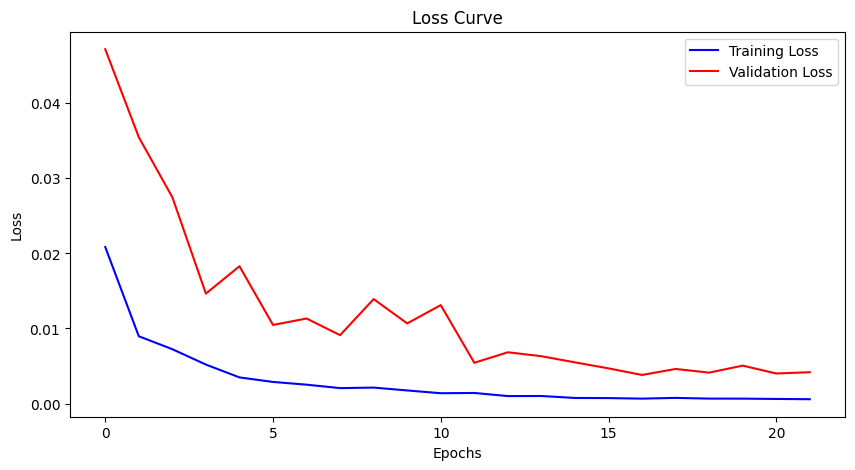

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()


In [15]:
num_features = len(new_scaler_other_features.feature_names_in_)  # Total number of features in df_scaled
print("Total Features:", num_features)  # Should match the original dataset before scaling
print(df.shape)

Total Features: 785
(1209, 786)


In [16]:
import numpy as np

# Create zero padding to match the original number of features
zero_padding = np.zeros((y_test.shape[0], num_features - 1))  # Shape: (230, 785)

# Stack `y_test` with zero_padding to match the original scaler input shape
y_test_expanded = np.hstack((zero_padding, y_test.reshape(-1,1)))  # Shape: (230, 786)

# Now apply inverse transform to get actual prices
y_test_original = new_scaler_other_features.inverse_transform(y_test_expanded)[:, -1]  # Extract last column

print("y_test_original shape:", y_test_original.shape)

y_test_original shape: (230,)


In [17]:
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step 


In [18]:
# Ensure y_pred has the right shape
y_pred_expanded = np.hstack((zero_padding, y_pred.reshape(-1, 1)))  # Shape: (230, 786)

# Apply inverse transform
y_pred_original = new_scaler_other_features.inverse_transform(y_pred_expanded)[:, -1]  # Extract last column

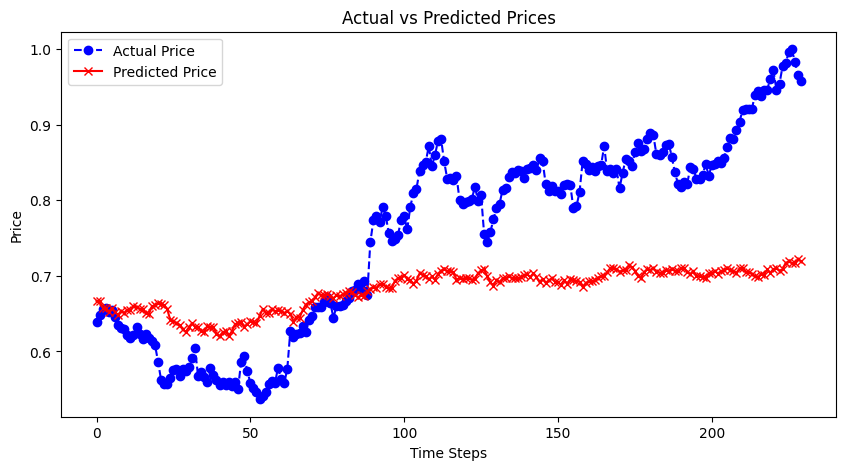

In [20]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test_original, label="Actual Price", marker='o', linestyle='dashed', color='blue')
plt.plot(y_pred_original, label="Predicted Price", marker='x', linestyle='solid', color='red')
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

## Check Min-Max Range After Scaling- Check Scaling Effectiveness

In [21]:
print("Scaled Data Min:", np.min(X_train))
print("Scaled Data Max:", np.max(X_train))
print("Year Min-Max:", df['year'].min(), df['year'].max())

Scaled Data Min: 0.0
Scaled Data Max: 1.0000000000000002
Year Min-Max: 0.0 1.0


In [22]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1209.000000  1209.000000  1209.000000  1209.000000  1209.000000   
mean      0.497475     0.501046     0.500511     0.498493     0.493846   
std       0.194707     0.193814     0.190976     0.193354     0.194883   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.375304     0.379480     0.381203     0.375885     0.370872   
50%       0.486156     0.490775     0.488746     0.487403     0.481064   
75%       0.609783     0.610790     0.609150     0.608530     0.604952   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Volume       SMA_20       EMA_50          RSI  Bollinger_High  \
count  1209.000000  1209.000000  1209.000000  1209.000000     1209.000000   
mean      0.169067     0.498607     0.496376     0.544441        0.502526   
std       0.129005     0.206716     0.219947     0.201893        0.206402   
min       0.000000     0.

## Check If Predictions Are Constant


In [23]:
print("Unique Predicted Values:", np.unique(y_pred_original))

Unique Predicted Values: [0.62014812 0.62032968 0.62357354 0.62544501 0.62555903 0.62565285
 0.62674844 0.62702131 0.62718296 0.62899566 0.63177598 0.63178813
 0.63187873 0.63262999 0.63263023 0.63270092 0.63376701 0.6349594
 0.63584721 0.63627762 0.63715321 0.63727009 0.63777608 0.63799399
 0.63884968 0.63926196 0.63931388 0.63987505 0.6403814  0.64138383
 0.64467162 0.6449762  0.64682746 0.64843023 0.64940637 0.64991987
 0.65019619 0.65095395 0.65100598 0.6511535  0.65128386 0.65226603
 0.65231133 0.653332   0.65334463 0.65363264 0.65383404 0.65420574
 0.65427703 0.65446055 0.65532684 0.65562022 0.65593934 0.65600765
 0.65624022 0.65645421 0.6569168  0.65729737 0.6580615  0.65832829
 0.65968835 0.66027796 0.66108954 0.66139483 0.66195965 0.66328239
 0.66394824 0.66482651 0.66644478 0.66692954 0.66699708 0.6706242
 0.6715014  0.67171228 0.67280596 0.67292982 0.6733737  0.67413342
 0.67444575 0.6744957  0.67463434 0.67475837 0.67545676 0.67607266
 0.67731321 0.67778623 0.67928058 0.679

## Check Learning Curves

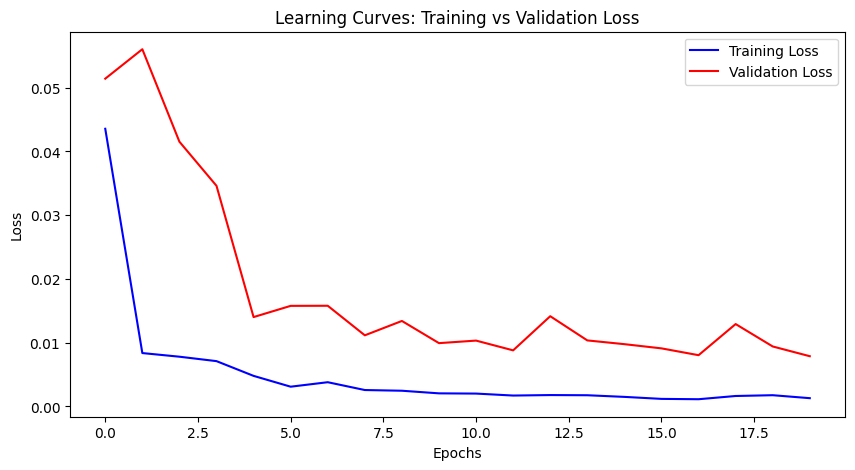

In [24]:
# Assuming 'history' is the result of model.fit()
plt.figure(figsize=(10, 5))

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curves: Training vs Validation Loss")
plt.legend()
plt.show()

In [25]:
# 1. Compare Predictions to the Mean
mean_true = np.mean(y_test_original)
mean_pred = np.mean(y_pred_original)
print(f"Mean of True Values: {mean_true:.2f}")
print(f"Mean of Predictions: {mean_pred:.2f}")

Mean of True Values: 0.75
Mean of Predictions: 0.68


In [26]:
# 2. Compute Standard Deviation of Predictions vs. True Values
std_true = np.std(y_test_original)
std_pred = np.std(y_pred_original)
print(f"Standard Deviation of True Values: {std_true:.2f}")
print(f"Standard Deviation of Predictions: {std_pred:.2f}")

Standard Deviation of True Values: 0.13
Standard Deviation of Predictions: 0.03


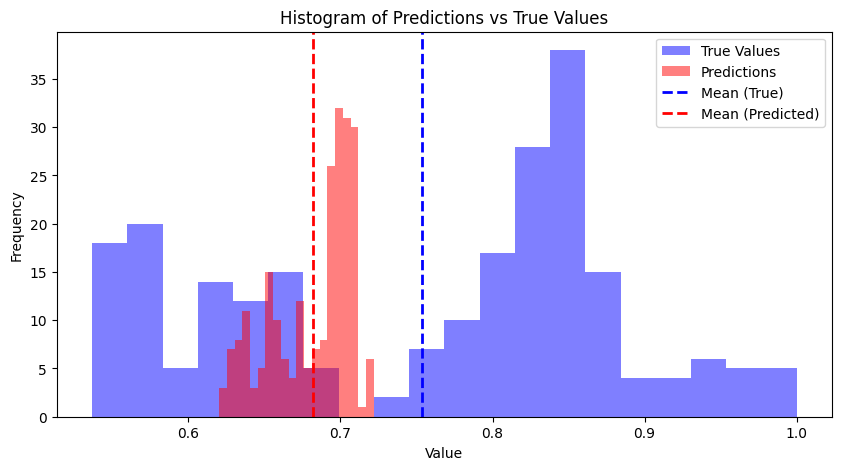

MSE (Mean Squared Error): 0.02
MAE (Mean Absolute Error): 0.11
✅ Model is capturing variance correctly.


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# 3. Plot Histogram of Predictions vs. True Values
plt.figure(figsize=(10,5))
plt.hist(y_test_original, bins=20, alpha=0.5, label="True Values", color='blue')
plt.hist(y_pred_original, bins=20, alpha=0.5, label="Predictions", color='red')
plt.axvline(mean_true, color='blue', linestyle='dashed', linewidth=2, label="Mean (True)")
plt.axvline(mean_pred, color='red', linestyle='dashed', linewidth=2, label="Mean (Predicted)")
plt.legend()
plt.title("Histogram of Predictions vs True Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# 4. Check Loss Function Behavior
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")

# 5. Check if Model is Predicting Mean
if np.abs(mean_pred - mean_true) < 1 and std_pred < 0.1 * std_true:
    print("⚠️ Warning: Model is likely predicting the mean!")
else:
    print("✅ Model is capturing variance correctly.")